In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hdf5storage

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, Normalizer

In [2]:
# Load the data
path="D:/alon_/Research/PhD/CODE/Data/Associative Training Data/Output Data/"
filename1 = path+'TFAssociativeSwitching_2019_07_09_13_41_46__test.mat'
filename2 = path+'TFAssociativeSwitching_2019_07_09_13_45_26__test.mat'

# filename =  path + 'Net_Sx_20_NoW500_03_30-2019_11_16_59_SimsOnly_2Electrodes_TRAINING_SIM_15-May-2019.mat'
data1 = loadmat(filename1)
data2 = loadmat(filename2)

In [3]:
OutputPattern1=[]
OutputPattern2=[]

OutputPattern1.append(data1["reflist"][0][0][4][0][20])
OutputPattern1.append(data1["reflist"][0][0][4][0][41])
OutputPattern2.append(data2["reflist"][0][0][4][0][15])
OutputPattern2.append(data2["reflist"][0][0][4][0][31])
OutputPattern1=np.array(OutputPattern1)
OutputPattern2=np.array(OutputPattern2)

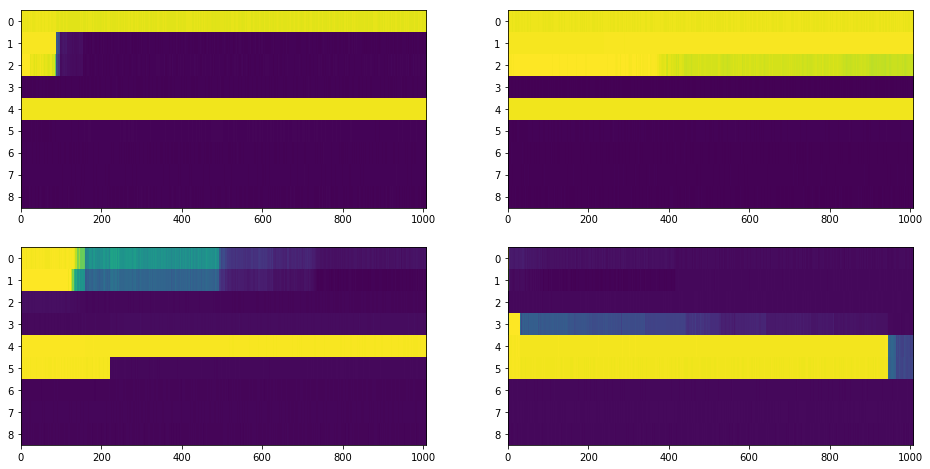

In [12]:
# Explore
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

axes[0,0].imshow(OutputPattern1[0].T, aspect = 'auto')
# plt.plot(OutputPattern1[0])
axes[0,1].imshow(OutputPattern1[1].T, aspect = 'auto')
axes[1,0].imshow(OutputPattern2[0].T, aspect = 'auto')
axes[1,1].imshow(OutputPattern2[1].T, aspect = 'auto')

In [13]:
OutputPattern1.shape

(2, 1008, 9)

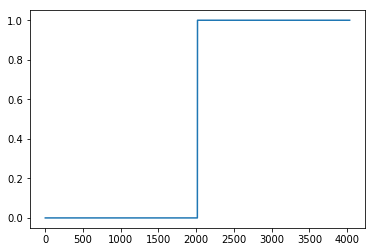

In [14]:
# Split the data
start_time = 0
X = np.vstack([OutputPattern1[0][start_time:], OutputPattern1[1][start_time:], OutputPattern2[0][start_time:], OutputPattern2[1][start_time:]])
X.shape
y=np.zeros((X.shape[0],))
y[len(OutputPattern1[0][start_time:]) + len(OutputPattern1[1][start_time:]):] = 1
plt.plot(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#Dimension reduction using PCA
pca=PCA(2)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

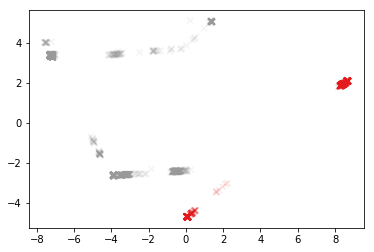

In [16]:
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train, marker = 'x', cmap = 'Set1', alpha = 0.1)

In [34]:
#Classifying the PCA reduced data

# clf2 = SVC(kernel = 'poly', C = 0.5, degree = 5, probability = True).fit(X_train_pca, y_train)
clf2 = LinearDiscriminantAnalysis().fit(X_train_pca, y_train)

# y_pred = clf2.predict(X_test_pca)

print('Test accuracy:', clf2.score(X_test_pca, y_test))

Test accuracy: 0.942998760842627


In [35]:
# Plot
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

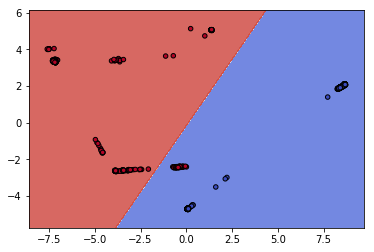

In [36]:
X0, X1 = X_test_pca[:, 0], X_test_pca[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig, ax = plt.subplots()
plot_contours(ax, clf2, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [37]:
# Load the test data
filename = path+'TFAssociativeSwitching_2019_07_09_13_49_08__test.mat' #Change this number
data_test1 = loadmat(filename)
filename2=path+'TFAssociativeSwitching_2019_07_09_13_45_26__test.mat'
data_test2 = loadmat(filename2)

In [38]:
TargetPattern1=[]
TargetPattern2=[]

TargetPattern1.append(data_test1["reflist"][0][0][4][0][15])
TargetPattern1.append(data_test1["reflist"][0][0][4][0][31])
TargetPattern2.append(data_test2["reflist"][0][0][4][0][15])
TargetPattern2.append(data_test2["reflist"][0][0][4][0][31])

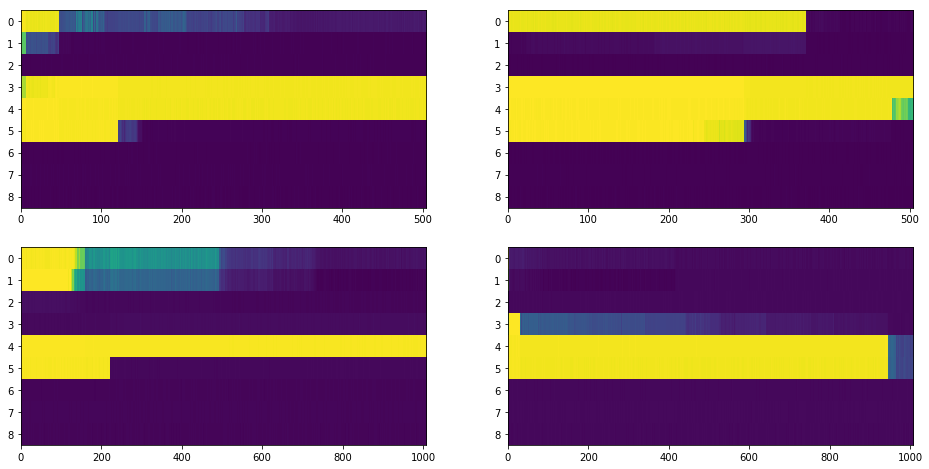

In [39]:
# Explore
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

axes[0,0].imshow(TargetPattern1[0].T, aspect = 'auto')
# plt.plot(OutputPattern1[0])
axes[0,1].imshow(TargetPattern1[1].T, aspect = 'auto')
axes[1,0].imshow(TargetPattern2[0].T, aspect = 'auto')
axes[1,1].imshow(TargetPattern2[1].T, aspect = 'auto')

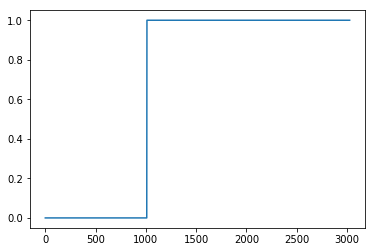

In [40]:
# Split the data
start_time = 0
X = np.vstack([TargetPattern1[0][start_time:], TargetPattern1[1][start_time:], TargetPattern2[0][start_time:], TargetPattern2[1][start_time:]])
X.shape
y=np.zeros((X.shape[0],))
y[len(TargetPattern1[0][start_time:]) + len(TargetPattern1[1][start_time:]):] = 1
plt.plot(y)

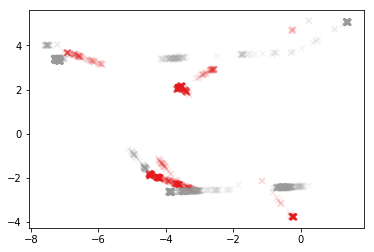

In [41]:
#PCA
X_pca=pca.transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c = y, marker = 'x', cmap = 'Set1', alpha = 0.1)

Test accuracy: 0.6023778071334214


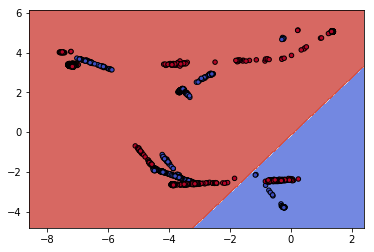

In [44]:
X0, X1 = X_pca[:, 0], X_pca[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig, ax = plt.subplots()
plot_contours(ax, clf2, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
print('Test accuracy:', clf2.score(X_pca, y))

In [33]:
clf1 = SVC(kernel = 'poly', C = 0.5, degree = 5, probability = True).fit(X_train, y_train)

clf2 = LinearDiscriminantAnalysis().fit(X_train, y_train)

print('Test accuracy:', clf2.score(X, y))

Test accuracy: 0.8025099075297226


c:\program files\python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
